In [11]:
from tensorflow.keras import layers, models

noOfClassses = 6
inputShape = (224,224,3) #(height, width, colors(RGB))
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape = inputShape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(noOfClassses, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
epochs = 10
history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator
)

Epoch 1/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 172s 481ms/step - accuracy: 0.2743 - loss: 1.8589 - val_accuracy: 0.4453 - val_loss: 1.4665
Epoch 2/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 173s 497ms/step - accuracy: 0.4507 - loss: 1.4367 - val_accuracy: 0.5191 - val_loss: 1.3061
Epoch 3/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 165s 475ms/step - accuracy: 0.5007 - loss: 1.3245 - val_accuracy: 0.5526 - val_loss: 1.2517
Epoch 4/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 163s 467ms/step - accuracy: 0.5377 - loss: 1.2366 - val_accuracy: 0.5587 - val_loss: 1.2003
Epoch 5/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 174s 500ms/step - accuracy: 0.5684 - loss: 1.1709 - val_accuracy: 0.5860 - val_loss: 1.1860
Epoch 6/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 164s 471ms/step - accuracy: 0.5945 - loss: 1.1027 - val_accuracy: 0.6066 - val_loss: 1.1247
Epoch 7/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 162s 467ms/step - accuracy: 0.6088 - loss: 1.0325 - val_accuracy: 0.6152 - val_loss: 1.0699
Epoch 8/10
348/348 ━━━━━━━━━━━━━━━━━━━━ 163s 469ms/step - accuracy: 0.6313 -

In [14]:
model.save('waste_classifier_model.keras')

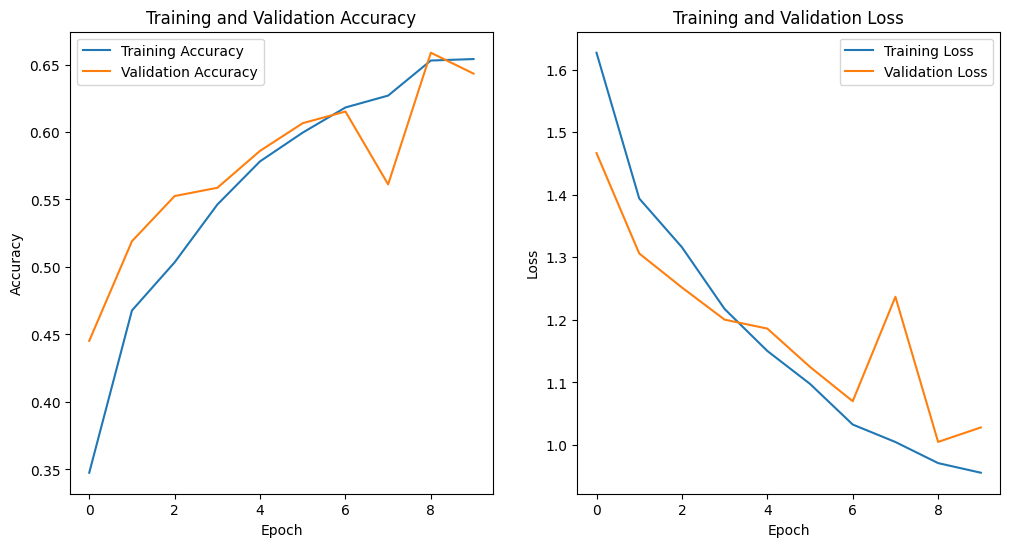

87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 376ms/step - accuracy: 0.6322 - loss: 1.0052
Validation Accuracy: 63.86%


In [15]:
import matplotlib.pyplot as plt

#plotting training and validation acccuracy
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

#plotting training and validation losses
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy*100:.2f}%")
model.save('waste_classifier_model.keras')